# Diabetes dataset

This dataset comes from Kaggle (that can be found https://www.kaggle.com/c/titanic) and it's designed for new students, who make them first steps in the Data Science. My algorithm will try to predict whether patient suffers from diabetes or not. 

The data constis of 12 features regarding person's health such as glucose level or blood pressure and there is 'Survived' column, which is a label column. Since this file has already been cleaned I'll not conduct Data Engineering activities.

### Importing all necessary libraries and checking basic inforamtion about DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np 
%matplotlib inline

In [36]:
df = pd.read_csv("titanic_train.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Explaratory Data Analysis

Let's explore our Data a bit! Firstly I'll check if there is some missing data

Text(0.5, 34.0, 'Features')

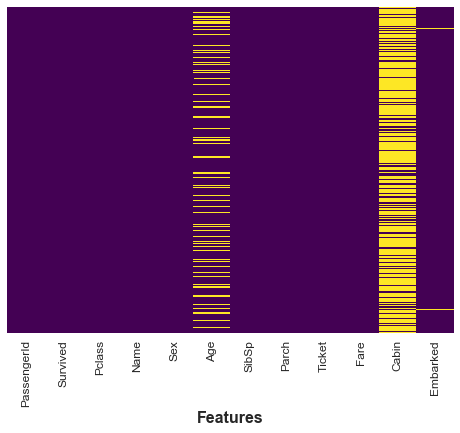

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,  cmap = 'viridis')
plt.xticks(fontsize = 12)
plt.xlabel('Features', fontsize=16, weight = 'bold', family = 'Arial')

### 'Cabin' column

As we can see, there are a lot of empty rows in the 'Cabin' column, so since there is not enough data to fill those holes reasonably the best way to handle it is to drop this particular column

### Age column

A little fraction of data from 'Age' column is missing. However in this case, since there is only little missing data, maybe we can use other features in order to put some reasonable values values there? Let's check our dataset again!

In [37]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In my perspective, the best way to tackle this problem is to fill these empty values with the mean values with regards to the passenger's ticket class. 

Let's see these mean values and then write a function!

In [62]:
pd.DataFrame(df.groupby(by='Pclass')['Age'].mean())

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


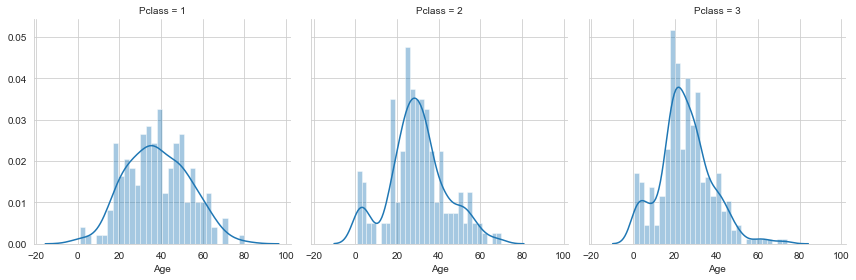

In [61]:
g = sns.FacetGrid(df, col='Pclass', height = 4)
g.map(sns.distplot, 'Age', bins = 30)

In [70]:
li = []
for num in range(1,4):
    li.append(round(df[df['Pclass'] == num]['Age'].mean()))
li[2]

25

In [ ]:
def fill_Age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 
        

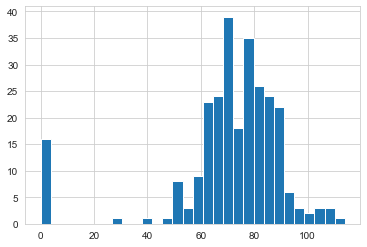

In [18]:
import cufflinks as cf
cf.go_offline()
df[df['Outcome']==1]['BloodPressure'].hist(bins = 30)

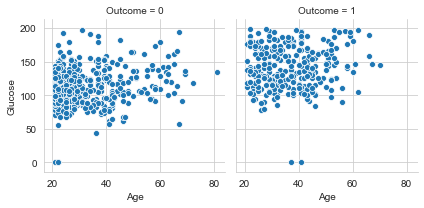

In [25]:
g = sns.FacetGrid(df, col='Outcome')
g.map(sns.scatterplot, 'Age', 'Glucose')

In [46]:
d = pd.DataFrame(df.groupby('Outcome')['Glucose'].mean())
d.set_index(pd.Index(['Healthy','Sick']))

,Glucose
Healthy,109.980000
Sick,141.257463


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

In [55]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

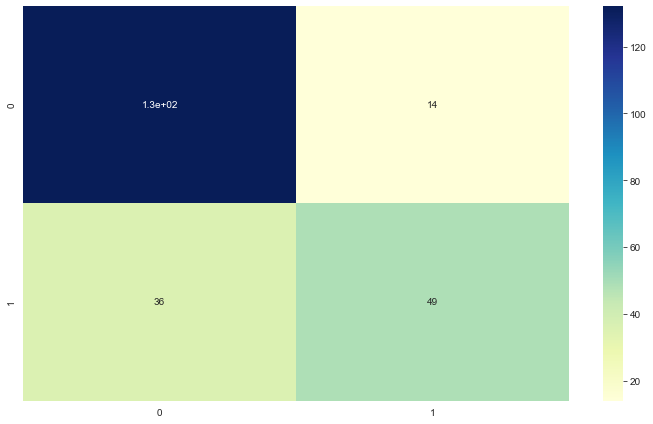

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="YlGnBu")
plt.tight_layout()

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

